## Imports

In [44]:
%load_ext autoreload
%autoreload 2
import util
import engutil
from scipy import io
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Spectrum plotting

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Sampling frequency: 96000
Detected Fundamental: 40.00 Hz
THD in velocity is 12.449 %
THD in SPL is 32.338 %


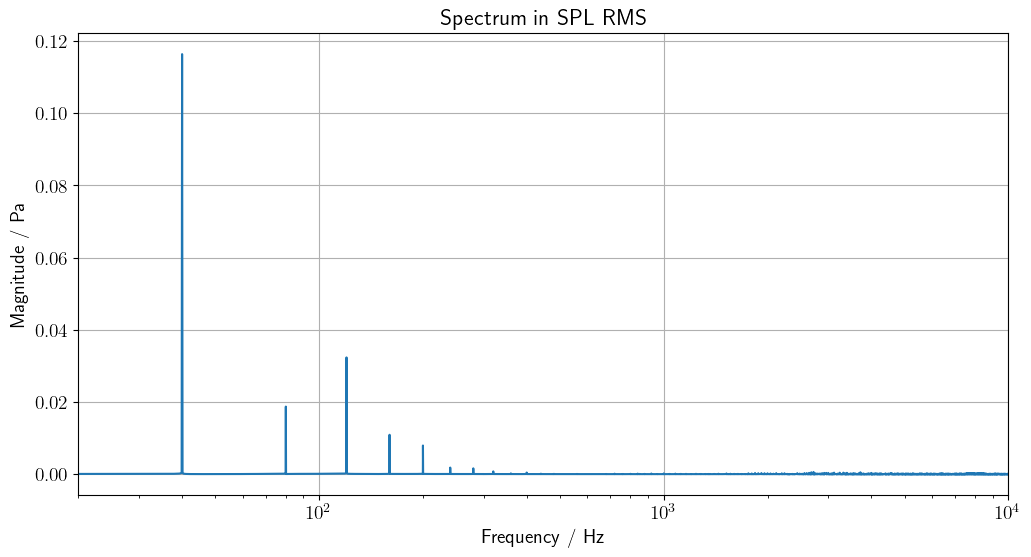

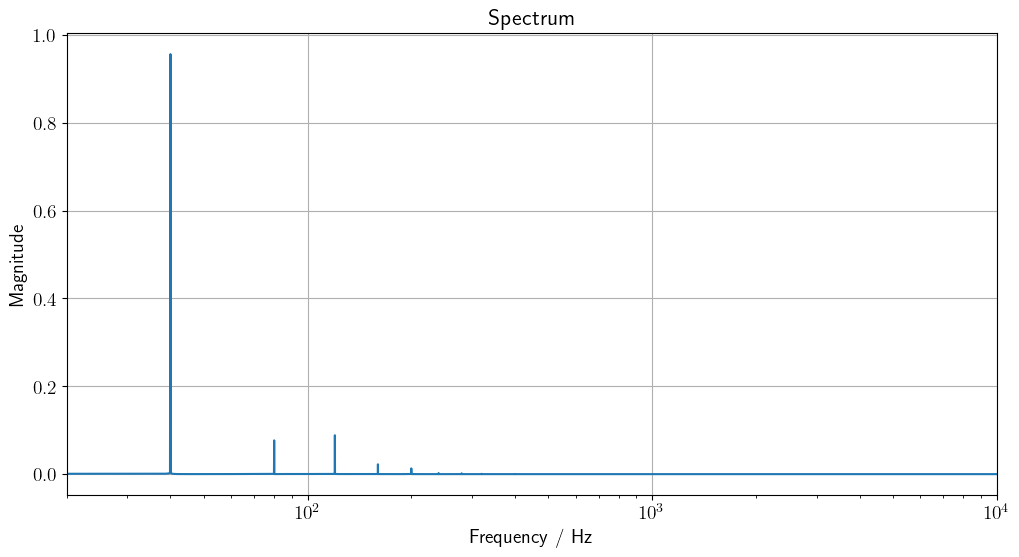

{1: 0.11643965648329524, 2: 0.018655311268844746, 3: 0.03236416959187397, 4: 0.010859066753566586, 5: 0.007962194941758828, 6: 0.001775233995473052, 7: 0.0016050852813503996, 8: 0.0007565198788677734, 9: 0.0002317102790586756, 10: 0.00044411542832581327, 11: 0.00013096934290716955, 12: 6.593545668970562e-05, 13: 1.0281062928371475e-05, 14: 7.819364316582388e-05, 15: 3.203308425221509e-05, 16: 1.833289464151715e-05, 17: 4.661231803724475e-05, 18: 0.00012604480094225784, 19: 4.38198411546283e-05}
{1: 0.9572286622540649, 2: 0.07668091434283521, 3: 0.08868659727291929, 4: 0.022317589762331905, 5: 0.013091143417791355, 6: 0.0024323111701473107, 7: 0.001885015175700721, 8: 0.0007774010735349175, 9: 0.00021164965723938648, 10: 0.00036509899649497693, 11: 9.787949998672752e-05, 12: 4.517025592797963e-05, 13: 6.5014382759422955e-06, 14: 4.591538085966894e-05, 15: 1.7555866739735475e-05, 16: 9.419456364218668e-06, 17: 2.254065637031786e-05, 18: 5.756615335455211e-05, 19: 1.895972250234004e-05}
0

In [19]:
%load_ext autoreload
%autoreload 2
import util
# path = "/Users/aske-/Documents/DTU/Kandidat/3. semester/Non linear transducers/puretone_f1_20Hz_f2_NoneHz_/puretone_f1_20Hz_f2_NoneHz_"

# data = io.loadmat(path + "/puretone_f1_20Hz_f2_NoneHz_0.15Vrms.mat")

path = "/Users/aske-/Documents/DTU/Kandidat/3. semester/Non linear transducers/puretone_f1_40Hz_f2_NoneHz_/puretone_f1_40Hz_f2_NoneHz_"

data = io.loadmat(path + "/puretone_f1_40Hz_f2_NoneHz_8Vrms.mat")

fs = data['sample_rate'][0][0]

print(f"Sampling frequency: {fs}")

u = np.squeeze(data['voltage'])
i = np.squeeze(data['current'])
d = np.squeeze(data['displacement'])
v = np.squeeze(data['velocity'])

t = np.linspace(0, 8, 8*fs)

THD_vel, THD_data_vel = util.thd_r(v, fs)
THD_spl, THD_data_spl = util.thd_spl(v, fs, radius=4e-2)

print(f"THD in velocity is {THD_vel * 100:.3f} %")
print(f"THD in SPL is {THD_spl * 100:.3f} %")

util.plot_spectrum_in_spl(v, fs, radius=4e-2, log=False, xlim=[20,10e3])
util.plot_spectrum(v,fs, xlim=[20,10e3])

# plt.figure()
# plt.plot(t, v)
# plt.xlim([2,2 + 3*1/40])
# plt.xlim([0,20*1/40])

print(THD_data_spl)
print(THD_data_vel)
print(util.find_fundemental_pRMS(v,fs,40,radius=4e-2))


In [5]:
path = "C:/Users/aske-/Documents/DTU/Kandidat/3. semester/Non linear transducers/Gruppe 2 - lab c og d/Gruppe 2 - lab c og d"

radius = 4e-2

def thd_spl_puretone(path, file_name, radius):
    data = io.loadmat(path + file_name)
    fs = data['sample_rate'][0][0]
    u = np.squeeze(data['voltage'])
    i = np.squeeze(data['current'])
    d = np.squeeze(data['displacement'])
    v = np.squeeze(data['velocity'])

    THD_spl, THD_data_spl = util.thd_spl(v, fs, radius=radius)
    return THD_spl

test_freq = np.array([20, 40, 80])
test_rms = np.array([0.15, 1.2, 2.4, 5])
thds = np.zeros((len(test_freq), len(test_rms)))

for i in range(len(test_freq)):
    for k in range(len(test_rms)):
        file_name = "/puretone_f1_" + str(test_freq[i]) + "Hz_f2_NoneHz_" + str(test_rms[k]) + "Vrms.mat"
        thds[i][k] = thd_spl_puretone(path, file_name=file_name, radius=radius)

print(thds*100)



[[ 9.19631168 18.86412289 31.84281198 69.47396059]
 [ 3.19707784  4.83623711  8.97285021 14.53934658]
 [ 1.37439635  0.96424239  1.02201677  1.79102887]]


In [102]:
path = "C:/Users/aske-/Documents/DTU/Kandidat/3. semester/Non linear transducers/Gruppe 2 - lab c og d/Gruppe 2 - lab c og d"

file_name = "/puretone_f1_40Hz_f2_810Hz_0.15Vrms"

def timd_spl_twotone(path, file_name, f1, f2, radius):
    data = io.loadmat(path + file_name)
    fs = data['sample_rate'][0][0]
    u = np.squeeze(data['voltage'])
    i = np.squeeze(data['current'])
    d = np.squeeze(data['displacement'])
    v = np.squeeze(data['velocity'])

    TIMD_spl = util.timd_spl(v, fs, f1, f2, radius=radius)
    return TIMD_spl

test_freq = np.array([20, 40, 80])
test_rms = np.array([0.15, 1.2, 2.4, 5])
timds = np.zeros((len(test_freq), len(test_rms)))

for i in range(len(test_freq)):
    for k in range(len(test_rms)):
        file_name = "/puretone_f1_" + str(test_freq[i]) + "Hz_f2_810Hz_" + str(test_rms[k]) + "Vrms.mat"
        timds[i][k] = timd_spl_twotone(path, file_name, test_freq[i], 810, radius)

print(timds*100)



c:\Users\aske-\Documents\DTU\Kandidat\3. semester\Non linear transducers\non-linear-transducers-project\util.py:411: RuntimeWarning: divide by zero encountered in log10
  Sd = r**2 * np.pi


[[ 2.89243337  5.05512192  9.70987313 15.52934292]
 [ 2.6388344   3.16797604  6.42537991 12.58989416]
 [ 0.81460981  1.69886724  3.25684217  7.25766693]]


In [6]:
import solver
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp

# setup params
Bl = 6.837193705842441
R_e = 4.822146670305587
R_m = 2.2833222074164836
K_m = 1107.8705431240523
L_e0 = 0.000305207582223968
M_m = 0.020004906958875274
L_20 = 0.0004325286577462285
R_20 = 2.504536634680621

Bln = [-2615563718.9455967, -3023090.98130258, -9835.616494456142, 21.171849188494026, Bl]
Kn  = [1724760519892.831, -5658865945.33859, 35715360.4027017, -210546.86882586573, K_m]
Ln  = [20081.188591764963, -319.17779393260366, 0.8155679039802962, -0.01018945289267653, L_e0]
Li  = [-0.0012237427320541485, -0.0014189369785025077, 0.007354393550658496, 0.005954177167801685, 1]

polys = {
    'Bl': np.poly1d(Bln),
    'K':  np.poly1d(Kn),
    'Le': np.poly1d(Ln),
    'Li': np.poly1d(Li)
}

params = {
    'Re': R_e, 'Rm': R_m, 'Mm': M_m, 'R20': R_20, 'L20': L_20, 'Le_nom': L_e0
}

# for calculating min fs
F_linear_static = np.array([
    [-(R_e + R_20)/L_e0,  R_20/L_e0,    0.0,         -Bl/L_e0],
    [R_20/L_20,          -R_20/L_20,    0.0,          0.0 ],
    [0.0,                   0.0,            0.0,          1.0],
    [Bl/M_m,                0.0,           -K_m/M_m,   -R_m/M_m]
])

x0 = np.array([0,0,0,0])

minimum_fs = util.calculate_min_fs(F_linear_static)
print(f"Minimum Linear fs: {minimum_fs:.2f}")

# duration 2 and 3 * min fs tog ~4min
duration = 5.0
fs = int(5 * minimum_fs)
t_eval = np.linspace(0, duration, int(fs*duration))
#u = util.generate_pink_noise(len(t_eval), fs, fmin=1)

# Run it with single tone
freq = 40
T = 1/freq
Vrms = 10

u = np.sqrt(2)*Vrms*np.sin(2 * np.pi * freq * t_eval)

# u(t) function - ie to be able to find values between sample values.. 
u_func = interp1d(t_eval, u, kind='linear', fill_value="extrapolate")

sol = solve_ivp(
    fun=solver.loudspeaker_ode,
    t_span=(0, duration),
    y0=x0,
    t_eval=t_eval,      
    args=(u_func, params, polys), 
    method='RK45',      
    rtol=1e-3,       # 1e-3   (was 5)
    atol=1e-6        # 1e-6 ( was 8)
)

Minimum Linear fs: 13027.62


## Puretone and THD measurements and simulations

In [53]:
# t:0
# u:1
# i:2
# i_jonathanSpang:3
# d:4
# v:5

radius = 4e-2

# Run it with single tone
freq = 40
T = 1/freq
Vrms = 8

path = "C:/Users/aske-/Documents/DTU/Kandidat/3. semester/Non linear transducers/Gruppe 2 - lab c og d/Gruppe 2 - lab c og d"

file_name = "/puretone_f1_" + str(freq) + "Hz_f2_NoneHz_" + str(Vrms) + "Vrms.mat"

data = io.loadmat(path + file_name)
fs_meas = data['sample_rate'][0][0]
# u = np.squeeze(data['voltage'])
# i = np.squeeze(data['current'])
# d = np.squeeze(data['displacement'])
v_meas = np.squeeze(data['velocity'])

duration = 8.0
# fs = int(5 * minimum_fs)
fs = fs_meas
t_eval = np.linspace(0, duration, int(fs*duration))

u = np.sqrt(2)*Vrms*np.sin(2 * np.pi * freq * t_eval)

# u(t) function - ie to be able to find values between sample values.. 
u_func = interp1d(t_eval, u, kind='linear', fill_value="extrapolate")

sol = solve_ivp(
    fun=solver.loudspeaker_ode,
    t_span=(0, duration),
    y0=x0,
    t_eval=t_eval,      
    args=(u_func, params, polys), 
    method='RK45',      
    rtol=1e-3,       # 1e-3   (was 5)
    atol=1e-6        # 1e-6 ( was 8)
)

sim_data = np.vstack((sol.t, u, sol.y))

t_sim = sim_data[0]
v_sim = sim_data[5]
# u_sim = sim_data[1]


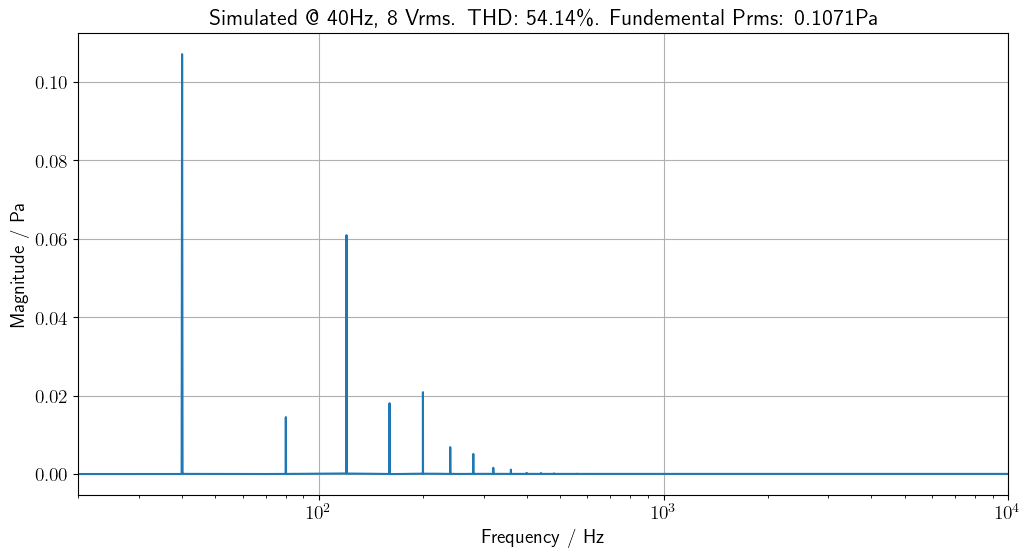

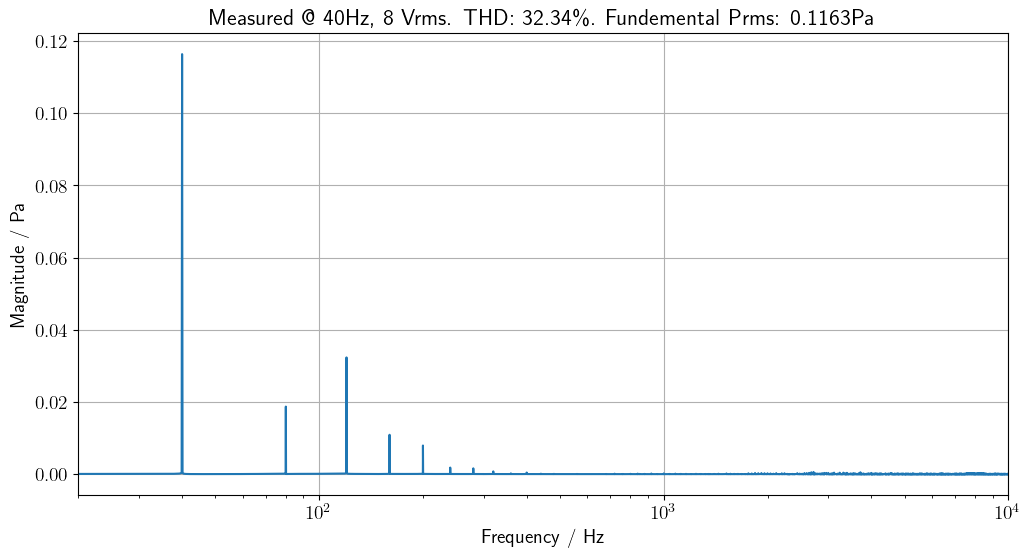

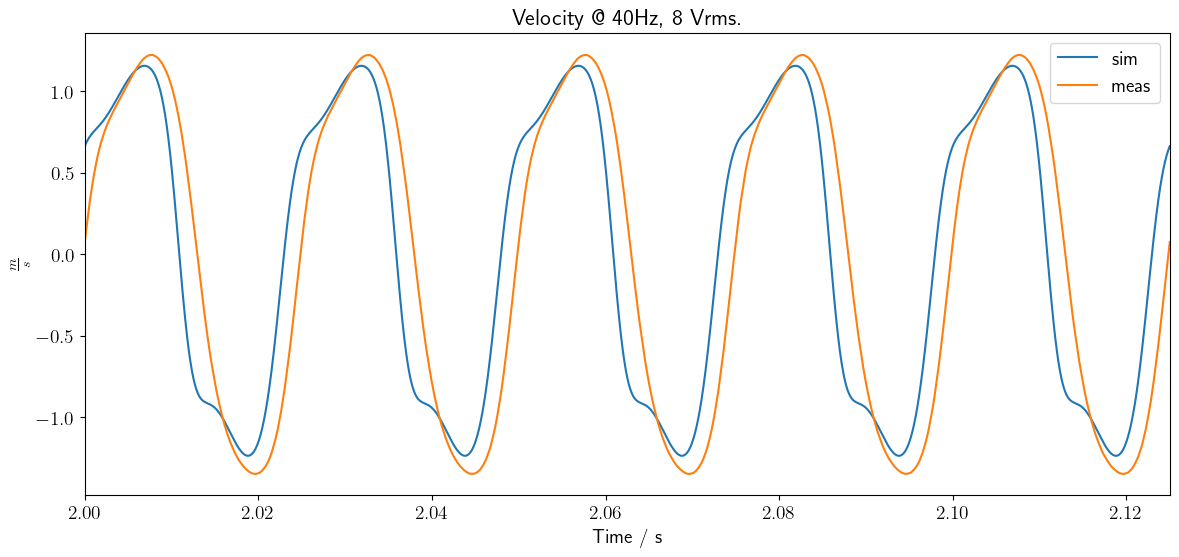

In [54]:
import util
Prms_meas = util.find_fundemental_pRMS(v_meas, fs, freq, radius)
THD_meas, THD_data_meas = util.thd_spl(v_meas, fs, radius=radius)
THD_meas = THD_meas*100

Prms_sim = util.find_fundemental_pRMS(v_sim, fs, freq, radius)
THD_sim, THD_data_sim = util.thd_spl(v_sim, fs, radius=radius)
THD_sim = THD_sim*100

util.plot_spectrum_in_spl(v_sim, fs, radius=radius, xlim=[20,10e3], title=f"Simulated @ {freq}Hz, {Vrms} Vrms. THD: {THD_sim:.2f}\\%. Fundemental Prms: {Prms_sim:.4f}Pa", save="figures/simulated_" + str(freq) + "Hz_" + str(Vrms) + "Vrms.png")
util.plot_spectrum_in_spl(v_meas, fs_meas, radius=4e-2, title=f"Measured @ {freq}Hz, {Vrms} Vrms. THD: {THD_meas:.2f}\\%. Fundemental Prms: {Prms_meas:.4f}Pa", xlim=[20,10e3], save="figures/measured_" + str(freq) + "Hz_" + str(Vrms) + "Vrms.png")

util.init_latex()
plt.figure(figsize=(14,6))
plt.plot(t_sim, v_sim, label="sim")
plt.plot(t_sim, v_meas, label="meas")
plt.xlabel("Time / s")
plt.ylabel("$\\frac{m}{s}$")
plt.title(f"Velocity @ {freq}Hz, {Vrms} Vrms.")
plt.legend()
plt.xlim([2,2 + 5*1/freq])
plt.savefig("figures/time_" + str(freq) + "Hz_" + str(Vrms) + "Vrms.png", bbox_inches="tight")
plt.show()

## Two freq and TIMD measurements and simulations

In [ ]:
# t:0
# u:1
# i:2
# i_jonathanSpang:3
# d:4
# v:5

radius = 4e-2

# Run it with two freq tone
freq = 40
freq2 = 810
T = 1/freq
Vrms = 6

path = "C:/Users/aske-/Documents/DTU/Kandidat/3. semester/Non linear transducers/Gruppe 2 - lab c og d/Gruppe 2 - lab c og d"

file_name = "/puretone_f1_" + str(freq) + "Hz_f2_810Hz_" + str(Vrms) + "Vrms.mat"

data = io.loadmat(path + file_name)
fs_meas = data['sample_rate'][0][0]
# u = np.squeeze(data['voltage'])
# i = np.squeeze(data['current'])
# d = np.squeeze(data['displacement'])
v_meas = np.squeeze(data['velocity'])

duration = 8.0
# fs = int(5 * minimum_fs)
fs = fs_meas
t_eval = np.linspace(0, duration, int(fs*duration))

u = np.sqrt(2)*Vrms*np.sin(2 * np.pi * freq * t_eval) + np.sqrt(2)*Vrms*np.sin(2 * np.pi * freq2 * t_eval)

# u(t) function - ie to be able to find values between sample values.. 
u_func = interp1d(t_eval, u, kind='linear', fill_value="extrapolate")

sol = solve_ivp(
    fun=solver.loudspeaker_ode,
    t_span=(0, duration),
    y0=x0,
    t_eval=t_eval,      
    args=(u_func, params, polys), 
    method='RK45',      
    rtol=1e-3,       # 1e-3   (was 5)
    atol=1e-6        # 1e-6 ( was 8)
)

sim_data = np.vstack((sol.t, u, sol.y))

t_sim = sim_data[0]
v_sim = sim_data[5]
# u_sim = sim_data[1]

c:\Users\aske-\Documents\DTU\Kandidat\3. semester\Non linear transducers\non-linear-transducers-project\util.py:414: RuntimeWarning: divide by zero encountered in log10
  p_rms_dB = 20*np.log10(p_rms/(20e-6))


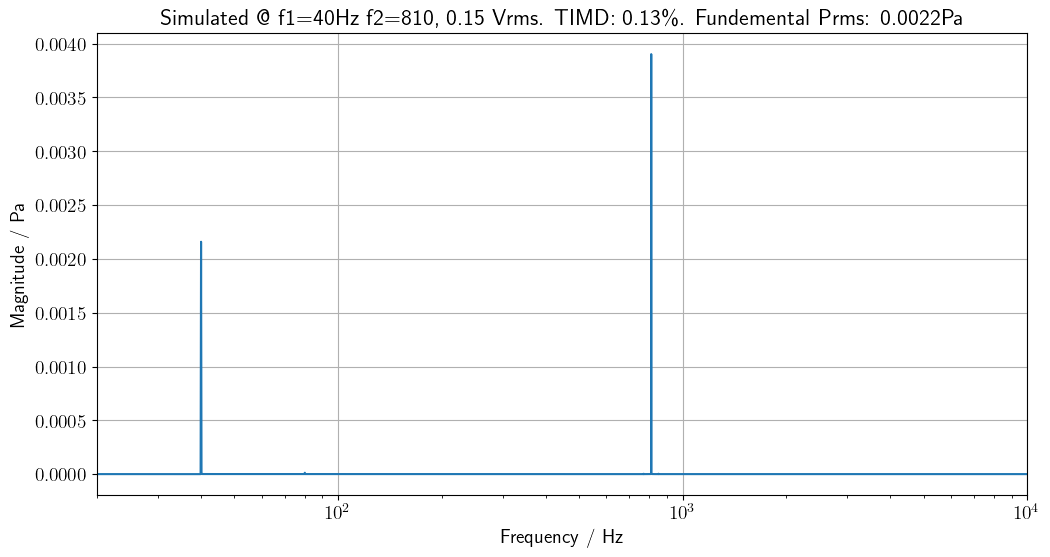

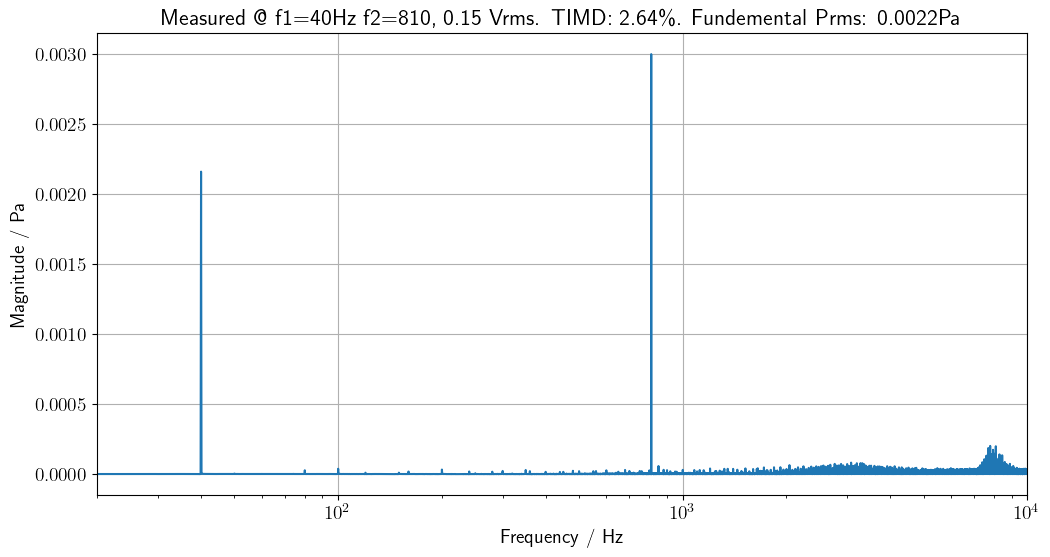

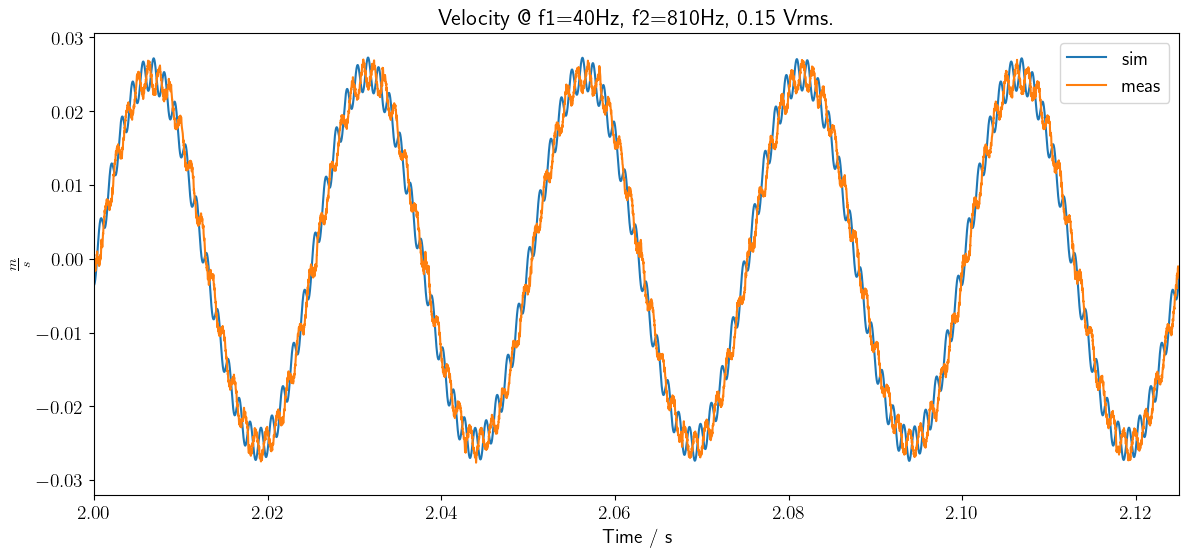

In [63]:
import util
Prms_meas = util.find_fundemental_pRMS(v_meas, fs, freq, radius)
TIMD_meas = util.timd_spl(v_meas, fs, freq, freq2, radius=radius)
TIMD_meas = TIMD_meas*100

Prms_sim = util.find_fundemental_pRMS(v_sim, fs, freq, radius)
TIMD_sim = util.timd_spl(v_sim, fs, freq, freq2, radius=radius)
TIMD_sim = TIMD_sim*100

util.plot_spectrum_in_spl(v_sim, fs, radius=radius, xlim=[20,10e3], title=f"Simulated @ f1={freq}Hz f2={freq2}, {Vrms} Vrms. TIMD: {TIMD_sim:.2f}\\%. Fundemental Prms: {Prms_sim:.4f}Pa", save="figures/timd_simulated_f1=" + str(freq) + "Hz_f2="+ str(freq2) + "Hz_" + str(Vrms) + "Vrms.png")
util.plot_spectrum_in_spl(v_meas, fs_meas, radius=4e-2, xlim=[20,10e3], title=f"Measured @ f1={freq}Hz f2={freq2}, {Vrms} Vrms. TIMD: {TIMD_meas:.2f}\\%. Fundemental Prms: {Prms_sim:.4f}Pa", save="figures/timd_meas_f1=" + str(freq) + "Hz_f2="+ str(freq2) + "Hz_" + str(Vrms) + "Vrms.png")

util.init_latex()
plt.figure(figsize=(14,6))
plt.plot(t_sim, v_sim, label="sim")
plt.plot(t_sim, v_meas, label="meas")
plt.xlabel("Time / s")
plt.ylabel("$\\frac{m}{s}$")
plt.title(f"Velocity @ f1={freq}Hz, f2={freq2}Hz, {Vrms} Vrms.")
plt.legend()
plt.xlim([2,2 + 5*1/freq])
plt.savefig("figures/time_f1=" + str(freq) + "Hz_f2=" + str(freq2) + "Hz_" + str(Vrms) + "Vrms.png", bbox_inches="tight")
plt.show()